# Homework 2: Sample Solution

## Homework Definition

- Task 1: Write a Python function that reads data from a file using get_data_from_file(ticker) and returns:
    - Mu (the average, relative daily Adj Close change). The spreadsheets have the formula.
    - Sigma -- The standard deviation of Mu. The spreadsheets have the formula.
    - There are libraries that will compute these values. Do not use the libraries. Translate the formulas in the speadsheet into Python code (loops, expressions, etc).


- Task 2: Simulate daily return - Write a function of the form: random_daily_return(s, mu, sigma).
    - The function computes the new daily stock price. This is the previous price S plus a random element. The formula for the random element is
    - delta = (s times mu) + (s times sigma times R).
    - You can import the package numpy as np. Use np.random.normal(0,1) to compute R. Compute R inside the function. (You can use numpy random normal if you want).
    - The new stock price you return is the input parameter s plus delta.


- Task 3: Create a function to produce the ramdom walk simulating a trading year. Call this random_stock_year.
    - There are 252 trading days in a year.
    - Build an return a list with 252 elements. Each element is the return value of a new call to random_daily_return. That is, you will call random_daily_return 252 times.
    - Return the list.



- Task 4: Main program.
    - imports
        - numpy as np
        - import math (to get sqrt)
        - import matplotlib.pyplot as plt
    - Parse command line arguments to input a ticker symbol and the number of simulation to execute. There is an example in the Mony Hall simulation that we covered in lectures. You will have to make minor modifications.
    - Validate the input and print an error message if it is invalid. The rules are:
        - The ticker symbol is in the list ['AAPL', 'GOOG', 'AMZN']. 
        - The number of simulations must be greater than 0.
        - Loop for the number of requested simulations. The loop should call
            - l = random_stock_year
            - plt.plot(l)
        - After the loop completes, call plt.show().

## Overall Structure

- I did not expect you to follow the model.


- This is FYI and for discussion.


- I implement 4 Python files:
    - General functions useful for simulations and general.
    - Function specific to the Monte Carlo Stock function.
    - Main program to setup and run simulations.
    - Unit tests for building the various functions.
    
    
| <img src="./hw2_components.jpeg"> |
| :---: |
| __HW2 Simple [UML Component Diagram](https://www.uml-diagrams.org/component-diagrams.html)__ |

## Task 1

### Get Data From File



In [1]:
'''
This is in the general  utilities file/module -- sim_utilsn
'''
import math
import pandas as pd
import numpy as np


def get_data_from_file(f_name):
    '''
    We had not yet covered exceptions, etc. Also, I gave you a function like this. I just modified
    :param f_name:
    :return:
    '''
    r = pd.read_csv(f_name, delimiter=",")
    return r


In [2]:
'''
This is in the unit test file/module.
'''
import sim_utils
import monte2

def unit_test_get_data_from_file():
    fn = "AAPL.csv"
    print("Testing getting data from file, fn = ", fn)
    result = sim_utils.get_data_from_file(fn)
    print("Result = \n", result.tail(5))
    
def run_unit_tests():
    unit_test_get_data_from_file()

    
run_unit_tests()

Testing getting data from file, fn =  AAPL.csv
Result = 
           Date        Open        High         Low       Close   Adj Close  \
17  2018-01-26  172.000000  172.000000  170.059998  171.509995  171.509995   
18  2018-01-29  170.160004  170.160004  167.070007  167.960007  167.960007   
19  2018-01-30  165.529999  167.369995  164.699997  166.970001  166.970001   
20  2018-01-31  166.869995  168.440002  166.500000  167.429993  167.429993   
21  2018-02-01  167.169998  168.619995  166.759995  167.779999  167.779999   

      Volume  
17  39143000  
18  50640400  
19  46048200  
20  32478900  
21  38428800  


- Look at a subset of the data.


- Visually verify correctness.

### Get Data From Ticker


In [3]:
# In Monte Carlo/Stock functions
import pandas as pd
import sim_utils

_file_suffix = ".csv"
'''
Old programmers tend to put constants like this in one place in a file or set of files.
Means I do not have to find all the places I used a string if I want to change.
The underscore sort of means "private to this module."
'''


def get_data_from_ticker(ticker):
    f_name = ticker + _file_suffix
    r = sim_utils.get_data_from_file(f_name)
    r = pd.read_csv(f_name, delimiter=",")
    return r


In [4]:
import monte2

def unit_test_get_data_from_ticker():
    t = "AAPL"
    print("Getting data for ticker = ", t)
    result = monte2.get_data_from_ticker(t)
    print("Result = \n", result.tail(5))
    
def run_unit_tests():
    #unit_test_get_data_from_file()
    unit_test_get_data_from_ticker()


run_unit_tests()
    

Getting data for ticker =  AAPL
Result = 
           Date        Open        High         Low       Close   Adj Close  \
17  2018-01-26  172.000000  172.000000  170.059998  171.509995  171.509995   
18  2018-01-29  170.160004  170.160004  167.070007  167.960007  167.960007   
19  2018-01-30  165.529999  167.369995  164.699997  166.970001  166.970001   
20  2018-01-31  166.869995  168.440002  166.500000  167.429993  167.429993   
21  2018-02-01  167.169998  168.619995  166.759995  167.779999  167.779999   

      Volume  
17  39143000  
18  50640400  
19  46048200  
20  32478900  
21  38428800  


### Compute Mu

- This is really two tasks:
    - Computing the relative change.
    - Computing the mean.
    

In [5]:
"""
In sim_utils
"""

def compute_relative_changes(a_list):
    """
    Computes the relative change between entries i and i+1 in a list.
    :param a_list: A list of numbers.
    :return: A list containing the relative changes.
    """
    result = []

    for i in range(1,len(a_list)):
        rel = (a_list[i] - a_list[i-1])/a_list[i-1]
        result.append(rel)

    return result


def compute_mean(a_list):
    total = 0;

    for i in range(0,len(a_list)):
        total = total + a_list[i]

    result = total / (len(a_list))
    return result



In [6]:
"""
In unit test.
"""
import sim_utils

simple_data = [1, 2, 3, 4, 5, 6]


def unit_test_relative_change():
    print("Testing relative changes.")
    r = sim_utils.compute_relative_changes(simple_data)
    print("relative changes for ", simple_data)
    print("have result result = ", r)


def unit_test_compute_avg():
    print("Testing compute avg")
    r = sim_utils.compute_mean(simple_data)
    print("Average for ", simple_data, " =  ", r)
    print("result = ", r)


def run_unit_tests():
    #unit_test_get_data_from_file()
    #unit_test_get_data_from_ticker()
    unit_test_relative_change()
    unit_test_compute_avg()


run_unit_tests()

Testing relative changes.
relative changes for  [1, 2, 3, 4, 5, 6]
have result result =  [1.0, 0.5, 0.3333333333333333, 0.25, 0.2]
Testing compute avg
Average for  [1, 2, 3, 4, 5, 6]  =   3.5
result =  3.5


__Note:__
- I ran the tests on small data to make sure I was getting the correct answer.
- These functions are simple, but some of you did make minor mistakes and were off by a range or some other small mistake.
- These are hard to correct for the real data, which has about 20 values and each is a multi-decimal real number.
- I also tested with other values, sizes of sets, etc. But, you get the idea.
    

### Compute Standard Deviation

- Pretty straight forward but not a lot of fun to validate.


- Try to reproduce someone else's answer.


| <img src="./std_deviation.jpeg"> |
| :---: |
| [Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation) |

In [7]:
'''
In sim_utils
'''
def compute_std_deviation(avg, data):
    total = 0
    for k in range(0,len(data)):
        total = total + (data[k]-avg)**2

    result = math.sqrt(total/(len(data)-1))
    return result


In [8]:
'''
In unit_test
'''
std_dev_data = [727.7, 1086.5, 1091, 1361.3, 1490.5, 1956.1]


def unit_test_wiki_data():
    print("Testing using Wikipedia example.")
    avg = sim_utils.compute_mean(std_dev_data)
    print("Avg = ", avg)
    sd = sim_utils.compute_std_deviation(avg, std_dev_data)
    print("STD = ", sd)


def run_unit_tests():
    #unit_test_get_data_from_file()
    #unit_test_get_data_from_ticker()
    #unit_test_relative_change()
    unit_test_compute_avg()
    unit_test_wiki_data()


run_unit_tests()

Testing compute avg
Average for  [1, 2, 3, 4, 5, 6]  =   3.5
result =  3.5
Testing using Wikipedia example.
Avg =  1285.5166666666667
STD =  420.96248961952256


### Get Mu and Sigma

- Putting some of the pieces together


- Provided a spreadsheet that provides functions and sample data for AAPL.


In [9]:
def verify_sample_data():
    print("Comparing to provided sample")
    stock_data = monte2.get_data_from_ticker('AAPL')
    stock_prices = stock_data['Adj Close']
    relative_changes = sim_utils.compute_relative_changes(stock_prices)
    mu = sim_utils.compute_mean(relative_changes)
    print("Mu = ", mu)
    sigma = sim_utils.compute_std_deviation(mu, relative_changes)
    print("Sigma = ", sigma)

def run_unit_tests():
    #unit_test_get_data_from_file()
    #unit_test_get_data_from_ticker()
    #unit_test_relative_change()
    #unit_test_compute_avg()
    #unit_test_wiki_data()
    verify_sample_data()


run_unit_tests()



Comparing to provided sample
Mu =  -0.00121312001591
Sigma =  0.00925301737572726


- The AAPL-Computed spreadsheet that I have you.

| <img src="aapl_data.jpeg"> |
|:---: |
| __AAPL Sample Provided__ |

## Task 2: Simulate Daily Change/Return

- The formula is: s = s + (s times mu) + (s times sigma times R)


- Part of the assignment was to have you be able to convert explanations of computations into actual Python, which is why I could not give in a more "code like" description.


In [10]:
'''
Goes in the Monet Carlo specific simulation package.
'''
def next_price(p, mu, sigma):
    r = np.random.normal(0,1)

    delta_p = mu*p + r*sigma*p
    p = p + delta_p

    return p

In [11]:
'''
Goes in the unit test package.
'''
def test_next_price(p, mu, sigma):
    print("Testing next_price(" + str(p) + "," + str(mu) + "," + str(sigma) + ")")
    result = monte2.next_price(p, mu, sigma)
    print("result = ", result)


def run_unit_tests():
    #unit_test_get_data_from_file()
    #unit_test_get_data_from_ticker()
    #unit_test_relative_change()
    #unit_test_compute_avg()
    #unit_test_wiki_data()
    #verify_sample_data()
    test_next_price(1, 0.25, 0)


run_unit_tests()

Testing next_price(1,0.25,0)
result =  1.25


- OK. I can tell that my function is correct for Mu.


- Well, what about with mu and sigma? There is some random behavior.


- The formula is pretty simple and I am reasonably confident. 


- I could call numpy and test fit to standard deviation, but that is overkill for something so simple.


- A simpler test is:
    - Call the next price function a few times with the same p, mu and sigma.
    - The average new price should be p(1 + mu) because np.normal(0,1)*x averages to 0 for any x.
        

In [12]:
def test_next_price_stats():
    mu = 0.25
    sigma = 0.333
    p = 1
    avg_new_price = 0
    total = 0

    tries = 1000
    for i in range(0, tries):
        result = monte2.next_price(p, mu, sigma)
        total = total + result

    avg_new_price = total/tries

    print("Testing stats. avg = ", avg_new_price)


def run_unit_tests():
    #unit_test_get_data_from_file()
    #unit_test_get_data_from_ticker()
    #unit_test_relative_change()
    #unit_test_compute_avg()
    #unit_test_wiki_data()
    #verify_sample_data()
    #test_next_price(1, 0.25, 0)
    test_next_price_stats()


run_unit_tests()


Testing stats. avg =  1.2486639024670898


- Good enough for government work.

| <img src="gefgw.png"> |
|:---: |
| [__"Good Enough for Government Work"__](https://en.wiktionary.org/wiki/close_enough_for_government_work) |


- Just because I want to show off.


In [13]:
def get_next_price_stats(tries):
    '''
    Return a list of generated next prices!
    '''
    mu = 0.25
    sigma = 0.333
    p = 1
    avg_new_price = 0
    total = 0
    
    result = []
    
    for i in range(0, tries):
        temp = monte2.next_price(p, mu, sigma)
        result.append(temp)

    return result


In [14]:
import matplotlib.pyplot as plt

tries = 100000
ps = get_next_price_stats(tries)

m = sum(ps)/float(len(ps))

plt.figure(figsize=(20,10))

d, bins, p = plt.hist(ps, bins=50)

top = 1.05*max(d)

plt.title("Histogram of next price.", fontsize=32)
plt.xlabel("Next price", fontsize=20)
plt.ylabel("Number of occurences in " + str(tries) + " samples.", fontsize=20)
plt.xticks([x/100 for x in range(0, 250, 10)])
plt.plot([m, m],[0,top], linewidth=5, color='red', label="Expected Mean")
plt.legend(fontsize=18)
plt.show

<function matplotlib.pyplot.show>

| <img src="wizard.jpg" width="75%"> |
|:---: |
| __Wizard__ |


- You will be one too!


- Stuff like this is why I keep complaining that the cool, engineering and science stuff in Python is not the mundane stuff in the book, which you can just read.

## Task 3: Simulate a Year


In [15]:
'''
In Monte Carlo Simulation.

Note that I am careless here because I am relying on the fact that start_p is immutable.
'''
def generate_random_year(start_p, mu, sigma, days):
    result = []
    for j in range(0,days):
        start_p = next_price(start_p, mu, sigma)
        result.append(start_p)

    return result

In [16]:
def test_random_year():
    start_p = 1
    mu = 0.25
    sigma = 0.333
    days = 10
    print("sSimulating multiple days. Mu = ", mu, "sigma = ", sigma, "days = ", days)
    result = monte2.generate_random_year(start_p, mu, sigma, days)
    print("result = ", result)

def run_unit_tests():
    #unit_test_get_data_from_file()
    #unit_test_get_data_from_ticker()
    #unit_test_relative_change()
    #unit_test_compute_avg()
    #unit_test_wiki_data()
    #verify_sample_data()
    #test_next_price(1, 0.25, 0)
    #test_next_price_stats()
    test_random_year()


run_unit_tests()

sSimulating multiple days. Mu =  0.25 sigma =  0.333 days =  10
result =  [1.0572661188843349, 1.5586392308960955, 2.241230992261796, 1.8319435065738916, 3.1898568442723514, 5.485007475312174, 6.967905490818472, 5.912441174562732, 5.432970207844785, 6.99703132179379]


- Seems OK.

## Task 4: Pull it Together


In [17]:
'''
Goes in Monte Carlo simulation
'''
def generate_random_year(start_p, mu, sigma, days):
    result = []
    for j in range(0,days):
        start_p = next_price(start_p, mu, sigma)
        result.append(start_p)

    return result


def run_simulations(ticker, days, years):
    df = get_data_from_ticker(ticker)
    prices = df['Adj Close']
    relative_changes = sim_utils.compute_relative_changes(prices)
    mu = sim_utils.compute_mean(relative_changes)
    sigma = sim_utils.compute_std_deviation(mu, relative_changes)
    start_p = float(prices.tail(1))
    print("Mu = ", mu)
    print("Sigma = ", sigma)
    print("Start price = ", start_p)
    each_year = []

    for i in range(0,years):
        y = generate_random_year(start_p, mu, sigma, days)
        each_year.append(y)

    return each_year


In [18]:
monte2.run_simulations('AAPL', 10, 2)

Mu =  -0.00121312001591
Sigma =  0.00925301737572726
Start price =  167.779999


[[165.25086234431126,
  166.57524769399981,
  168.12114587034802,
  167.65666801367206,
  165.4414501962587,
  164.31302187964178,
  162.05483560307363,
  160.41273569822508,
  159.08661398479404,
  160.16070456702596],
 [164.19790307679838,
  163.25982986569076,
  161.82734344394567,
  161.64730309189744,
  158.43960741665154,
  159.3573858639609,
  156.58531843807151,
  156.1096331570138,
  154.88038993159958,
  153.25644638525779]]

- Looks sort of OK.
    - Two years in the result.
    - 10 days in each year.
    - Seems to wander down.

Mu =  -0.00121312001591
Sigma =  0.00925301737572726
Start price =  167.779999


<function matplotlib.pyplot.show>

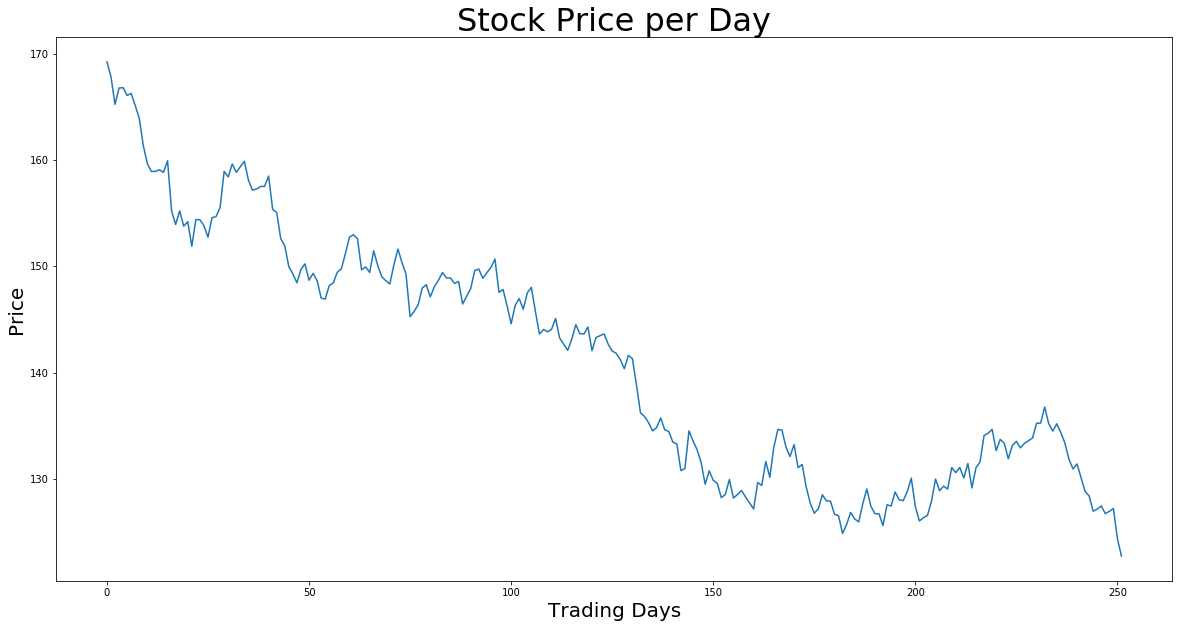

In [22]:
plt.close()
plt.figure(figsize=(20,10))

result = monte2.run_simulations('AAPL', 252, 1)
plt.title("Stock Price per Day", fontsize=32)
plt.xlabel("Trading Days", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.plot(result[0])
plt.show

## Overall Simulation Driver


In [25]:
#!/usr/bin/env pythonw
import argparse
import json
import monte2
import matplotlib.pyplot as plt

# These should be private. Will cover later
# For numeric parameters, these are lower and upper bounds if there are bounds.
# For strings, these are constraints on values if there are any.
trading_days_lbound = 10
trading_days_ubound = 252
trading_years_lbound = 0
trading_years_ubound = 1000
bins_ubound = 20
bins_lbound = 10
valid_y_n = ["Y", "N", "y", "n"]
valid_tickers = ["AAPL", "GOOG", "AMZN"]

general_patience = 2

# Determines if the program is interactive or is running inside something
# like a Jupyter notebook.
def is_interactive():
    import __main__ as main
    return not hasattr(main, '__file__')


# Default is that the program is not interactive.
# Change from the prompt or a Jupyter cell if is interactive.
interactive = True
interactive = is_interactive()


# Inputs are a prompt string, the upper and lower bounds on the value and the
# number of failed attempts to tolerate.
def safe_get_int(prompt, lbound, ubound, patience):
    done = False
    result = None
    temp = None
    tries = 0

    # Loop until successful input or have exhausted all the tries.
    while (not done) and (tries <= patience):
        # The try ... except implements toleration for non-integer inputs.
        try:
            tries += 1
            temp = input(prompt + ":")
            temp = int(temp)
            if (temp < lbound) or (temp > ubound):
                print("Valid range is " + str(lbound) + " to " + str(ubound) + " Try again.")
            else:
                done = True
                result = temp
        except TypeError as ve:
            # Not an integer. Will try again.
            # Will print a specific error message.
            print("Input must be an integer.")
        except Exception as e:
            # Not sure what happened but will try again.
            print("Got an expected exception. Trying again.")

    # Did the function fail in getting a valid input?
    if not done:
        # Not my finest error message.
        print("Prepare to die fool!")
        raise ValueError

    return result


# Prompts for a string input. The inputs are:
# - prompt message
# - An optional list of valid inputs.
# - The number of base inputs to tolerate.
def safe_get_string(prompt, valid_values, patience):
    done = False
    result = None
    temp = None
    tries = 0

    # Loop until valid input or too many failed attempts.
    while (not done) and (tries <= patience):
        try:
            tries += 1
            temp = input(prompt + ":")
            if not temp in valid_values:
                print("Valid values are ", valid_values)
            else:
                done = True
                result = temp

        # Should narrow this exception to something more specific
        except Exception as e:
            print("Got exception. Trying again.")

    # Raise input value failure.
    if not done:
        print("Prepare to die fool!")
        raise ValueError

    return result


# Double checks all of the input parameters to ensure correctness.
# Input is a dictionary of parameter names and values.
def validate_args(args):
    result = True
    try:
        if args['trading_years'] is None or \
            args['trading_days'] is None or \
            args['bins'] is None or \
            args['ticker'] is None or \
            args['plot_to_file'] is None:
            result = False
            return result

        if args['trading_years'] > trading_years_ubound or args['trading_years'] < trading_years_lbound:
            result = False
            # This and the following error messages should be more complete, e.g. shows bounds.
            print("Trading years invalid.")
        elif args['trading_days'] > trading_days_ubound or args['trading_days'] < trading_days_lbound:
            result = False
            print("Trading days invalid.")
        elif args['bins'] > bins_ubound or args['bins'] < bins_lbound:
            result = False
            print("Bins invalid.")
        elif args['ticker'] not in valid_tickers:
            result = False
            print("Ticker invalid.")
        elif args['plot_to_file'] not in valid_y_n:
            result = False
            print("Plot to file invalid.")
    except Exception as e:
        print("Print something awful happened.",e)
        raise ValueError

    return result


# Gets and validates the input parameters that define the simulation.
def get_args():

    result = None

    # If the program is not interactive, parse the arguments.
    # The help messages should be more descriptive.
    if not interactive:
        parser = argparse.ArgumentParser(
            description='Monte Carlo GBM simulation of stock price evolution..')
        parser.add_argument('--ticker', default=None, type=str, metavar='str',
                            help='Ticker to simulate')
        parser.add_argument('--trading_days', default=None, type=int, metavar='int',
                            help='Number of trading days per year.')
        parser.add_argument('--trading_years', default=None, type=int, metavar='int',
                            help='Number of random years to simulate.')
        parser.add_argument('--bins', default=20, type=int, metavar='int',
                            help='Number of bins for return histogram')
        parser.add_argument('--plot_to_file', default="N", type=str, metavar='str',
                            help='Write charts to file?')
        parser.add_argument('--simulation_label', default="default", type=str, metavar='str',
                            help='Label for simulation.')
        args = parser.parse_args()
        result = vars(args)
    else:
        # The program is interactive. Will use prompts.
        result = {}

        # Notice that the code below is very highly patterned. I could simply into a parameterized procedures
        # that incorporates the two steps, which would be less error prone.
        temp = safe_get_string("Enter ticker:", valid_tickers, general_patience)
        result = {"ticker": temp}

        temp = safe_get_int("Enter no. of trading days", trading_days_lbound, trading_days_ubound, general_patience)
        result['trading_days'] = temp

        temp = safe_get_int("Number of years to simulate", trading_years_lbound, \
                            trading_years_ubound, general_patience)
        result['trading_years'] =  temp

        temp = safe_get_int("Enter no. of histogram bins", bins_lbound, bins_ubound,general_patience)
        result['bins'] = temp

        temp = input("Plot to file (Y/N):")
        result['plot_to_file'] = temp

        temp = input("Simulation label:")
        result['simulation_label'] = temp

    return result


# Plots the yearly returns
# If n is not none, this is the file to plot to.
def year_plot(yy,n):
    plt.figure(figsize=(20,10))
    for i in range(0, len(yy)):
        plt.plot(yy[i])

    if n is not None:
        plt.savefig(n)
    else:
        plt.show()

    plt.close()


# Plots the histogram of returns
# If n is not none, this is the file to plot to.
def histo_return(yy, b, n):
    r = []
    for i in range(0,len(yy)):
        t = yy[i]
        t = t[-1]
        r.append(t)

#    print(r)
    plt.figure(figsize=(20,10))
    plt.hist(r,b)
    if n is not None:
        plt.savefig(n)
    else:
        plt.show()

    plt.close()


def run_simulation(args):
    print("Running simulations with parameters:\n")
    print(json.dumps(args,indent=2))
    result = monte2.run_simulations(args['ticker'], args['trading_days'], args['trading_years'])

    if args['plot_to_file'] == 'Y':
        fy = args['simulation_label'] + "_years.png"
        fh = args['simulation_label'] + "_histo.png"
    else:
        fy = None
        fh = None

#    print("Years = ", result)
    year_plot(result, fy)
    histo_return(result, args['bins'], fh)

    return result


# This module should/could be callable from other main programs. The other main programs may pass in parameters.
def configure_and_run_simulation(args):
    if validate_args(args):
        run_simulation(args)
    else:
        raise ValueError("Invalid input parameters.")


# The main program if the simulation is running standalone.
def run_it():
    args = get_args()
    if validate_args(args):
        print("On the way.")
        run_simulation(args)
    else:
        print("Got an error.")


#interactive = True
#run_it()

if not interactive:
    run_it()

Enter ticker::AAPL
Enter no. of trading days:252
Number of years to simulate:10
Enter no. of histogram bins:20
Plot to file (Y/N):N
Simulation label:Foo
On the way.
Running simulations with parameters:

{
  "ticker": "AAPL",
  "trading_days": 252,
  "trading_years": 10,
  "bins": 20,
  "plot_to_file": "N",
  "simulation_label": "Foo"
}
Mu =  -0.00121312001591
Sigma =  0.00925301737572726
Start price =  167.779999


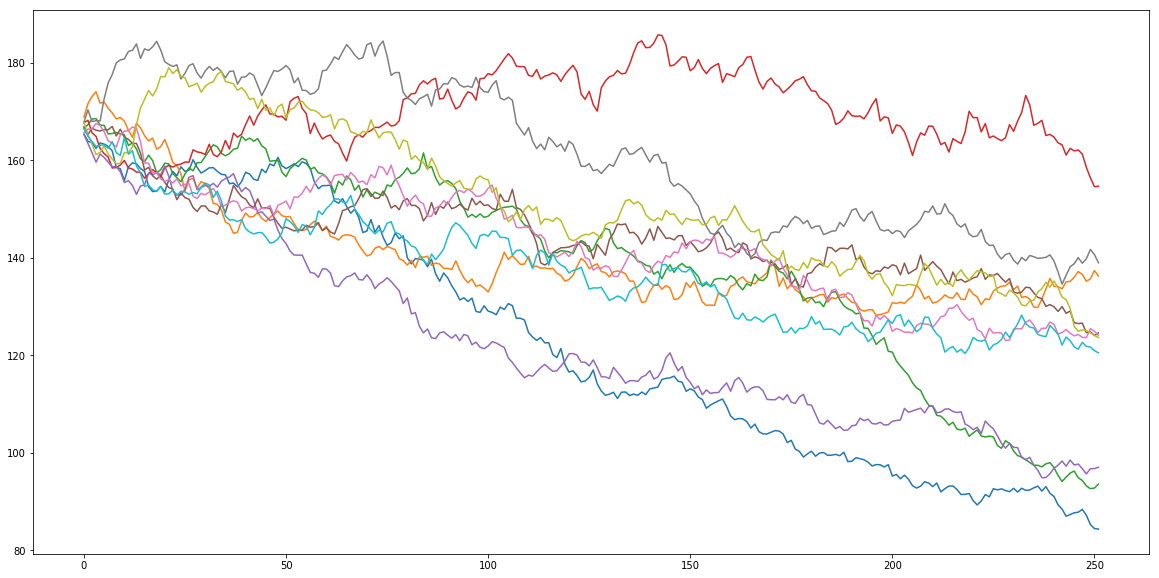

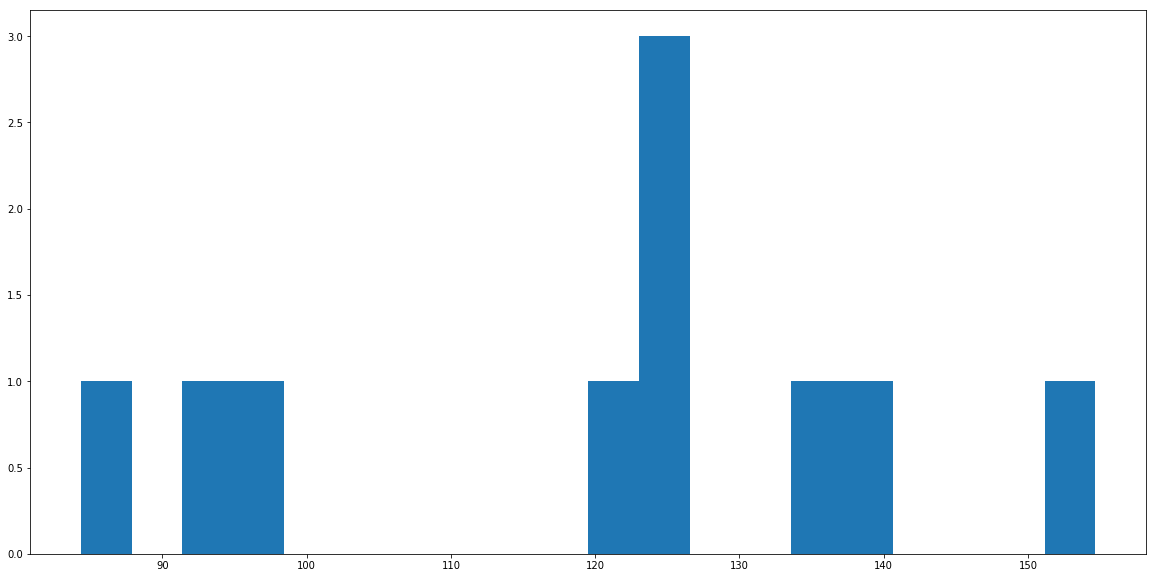

In [26]:
run_it()

Enter ticker::AAPL
Enter no. of trading days:252
Number of years to simulate:1000
Enter no. of histogram bins:20
Plot to file (Y/N):n
Simulation label:Long
On the way.
Running simulations with parameters:

{
  "ticker": "AAPL",
  "trading_days": 252,
  "trading_years": 1000,
  "bins": 20,
  "plot_to_file": "n",
  "simulation_label": "Long"
}
Mu =  -0.00121312001591
Sigma =  0.00925301737572726
Start price =  167.779999


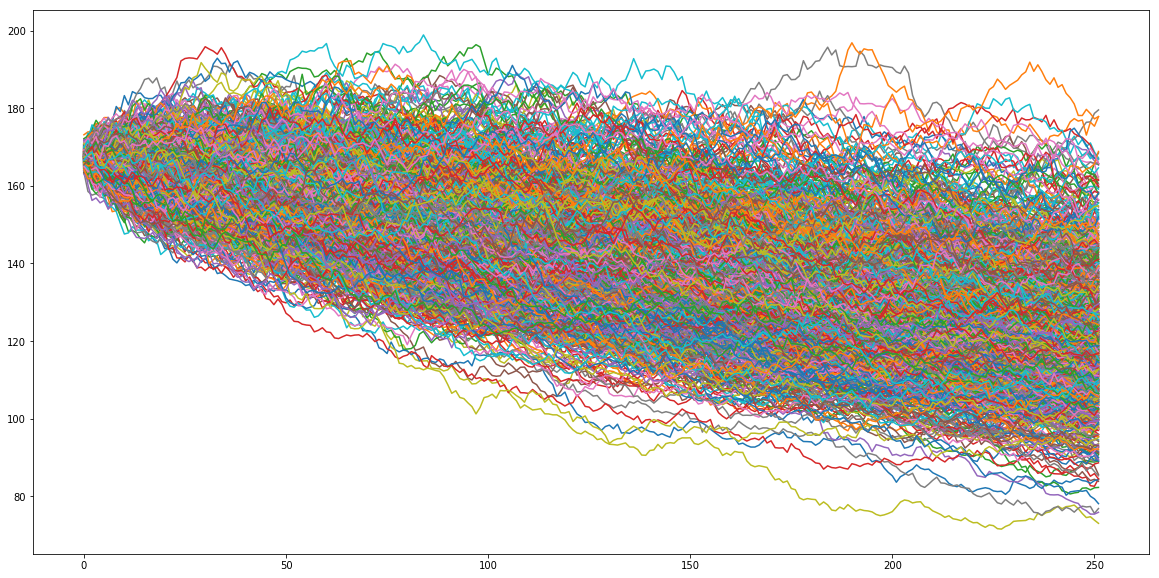

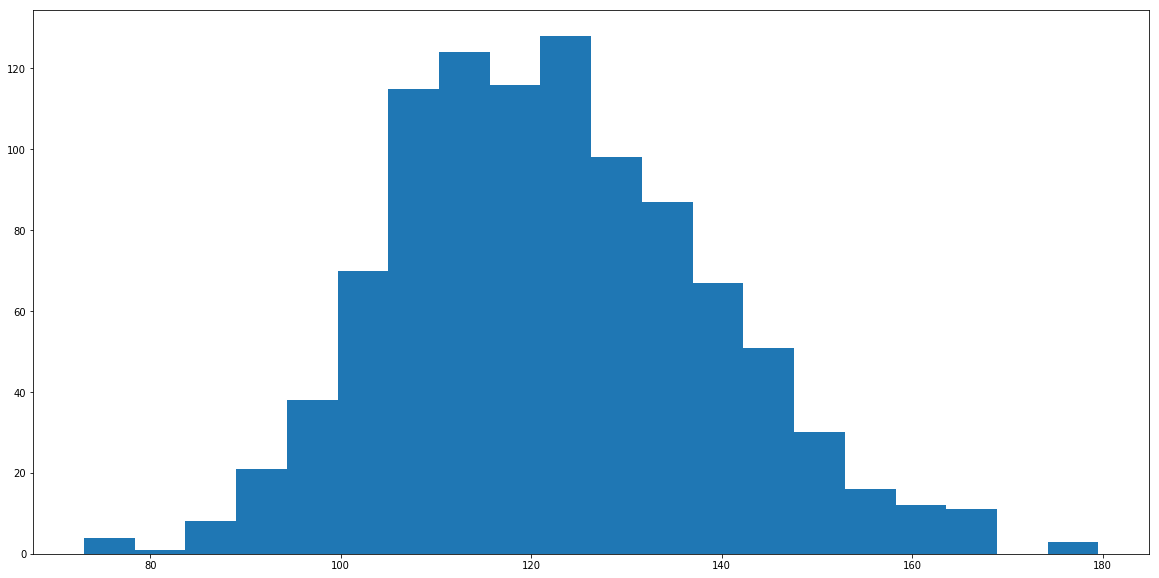

In [27]:
run_it()


## Why all that Command Line Stuff?

| <img src="command_sample.jpeg" width="100%"> |
|:---: |
| __Command Line Execution__ |

- I can now run one, two or a bazillion simulations without someone sitting there, entering the values, etc.

In [ ]:
#!/bin/bash
echo "About to run simulations."
./stock_main.py --ticker AAPL --trading_days 252 --trading_years 100 --bins 20 --plot_to_file Y --simulation_label command_line_test_aapl
./stock_main.py --ticker GOOG --trading_days 252 --trading_years 100 --bins 20 --plot_to_file Y --simulation_label command_line_test_goog
./stock_main.py --ticker AMZN --trading_days 252 --trading_years 100 --bins 20 --plot_to_file Y --simulation_label command_line_test_amzn

| <img src="multiple_sims.jpeg" width="100%"> |
|:---: |
| __Multiple Simulations Command Line Execution__ |

- And I can upload code to a shared set of servers, and execute many times, with many configuration params.


- And then download the results.

| <img src="L5_cloud_simulate.jpeg" width="100%"> |
|:---: |
| __Command Line Execution__ |